# Esse programa foi elaborado para auxiliar a visualização de um dos principais problemas logísticos da cadeia produtiva do pirarucu na Reserva de Desenvolvimento Sustentável Mamirauá, no estado do Amazonas, Brasil. 

Os dados de geometria, da posição geográfica, e do PIB dos municípios foram obtidos do link: https://dados.gov.br/dataset/cgeo_vw_pib_percapita.

Dados relacionados à hidrografia foram obtidos do link: https://sosgisbr.com/2011/07/14/ottobacias-shapefiles-para-download/


In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from shapely import wkt

In [3]:
from matplotlib_scalebar.scalebar import ScaleBar

In [4]:
pib = pd.read_csv('vw_pib_percapita.csv')

In [5]:
pib_AM = pib[pib.UF == 'AMAZONAS']

In [6]:
# Mostra os cinco maiores PIB per capita
pib_AM.sort_values(by='PIB_percapita', ascending=False).head()

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
333,vw_pib_percapita.fid-1aa56691_182938e9f3d_-3a64,1572,AMAZONAS,Manaus,2010.0,4.048611e+07,1738641,23286.060547,Produto Interno Bruto per capita,22144.80 - 52702.10,3,MULTIPOLYGON (((-60.001611142130734 -2.1191118...
800,vw_pib_percapita.fid-1aa56691_182938e9f3d_74f7,5504,AMAZONAS,Coari,2010.0,1.103350e+06,66991,16470.119141,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-64.36668555555553 -2.26476222...
2971,vw_pib_percapita.fid-1aa56691_182938f6222_1309,994,AMAZONAS,Presidente Figueiredo,2010.0,3.045994e+05,26282,11589.660156,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-60.00015486843817 -0.56917879...
2633,vw_pib_percapita.fid-1aa56691_182938f5c66_-5ff0,5529,AMAZONAS,Itacoatiara,2010.0,9.199674e+05,89440,10285.860352,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-59.05076679976359 -2.58663409...
5552,vw_pib_percapita.fid-1aa56691_182938f7404_e85,759,AMAZONAS,Lábrea,2010.0,3.945623e+05,39393,10016.049805,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-67.05452481485429 -6.96610915...


https://g1.globo.com/am/amazonas/noticia/2011/12/manaus-mantem-6-posicao-entre-os-municipios-com-maior-pib-do-pais.html

Link mostra que dados usados são de 2009, como constava na base de dados

In [7]:
cols = pib_AM.columns

In [8]:
drop_col = []
for i in cols:
    if i not in ['PIB_percapita','geom']:
        drop_col.append(i)
    else: continue

In [9]:
drop_col

['FID',
 'gid',
 'UF',
 'nome',
 'Censo',
 'PIB',
 'Pop_est_2009',
 'Descrição',
 'legenda',
 'classe']

In [10]:
pib_AM_ppc = pib_AM.drop(axis=1, labels=drop_col)

In [11]:
# cd vw_pib_percapita

In [12]:
map_df = gpd.read_file('vw_pib_percapita/vw_pib_percapitaPolygon.shp')

libcfitsio.so.10: cannot open shared object file: No such file or directory
libcfitsio.so.10: cannot open shared object file: No such file or directory
libarrow_dataset.so.1500: cannot open shared object file: No such file or directory
libarrow_dataset.so.1500: cannot open shared object file: No such file or directory
libpodofo.so.2: cannot open shared object file: No such file or directory
libpodofo.so.2: cannot open shared object file: No such file or directory
libarrow.so.1500: cannot open shared object file: No such file or directory
libarrow.so.1500: cannot open shared object file: No such file or directory
libcfitsio.so.10: cannot open shared object file: No such file or directory
libcfitsio.so.10: cannot open shared object file: No such file or directory
libarrow_dataset.so.1500: cannot open shared object file: No such file or directory
libarrow_dataset.so.1500: cannot open shared object file: No such file or directory
libpodofo.so.2: cannot open shared object file: No such file

In [32]:
map_df.head()
map_df.sort_values(by='PIB_percap', ascending=False).head()

,gid,UF,nome,Censo,PIB,Pop_est_20,PIB_percap,Descrição,legenda,classe,geometry
333,1572,AMAZONAS,Manaus,2010,40486108.00,1738641.0,23286.06,Produto Interno Bruto per capita,22144.80 - 52702.10,3,"POLYGON ((1504770.820 -237162.527, 1504793.807..."
800,5504,AMAZONAS,Coari,2010,1103350.10,66991.0,16470.12,Produto Interno Bruto per capita,9639.65 - 22144.80,2,"POLYGON ((1015736.301 -251151.002, 1015636.551..."
2971,994,AMAZONAS,Presidente Figueiredo,2010,304599.38,26282.0,11589.66,Produto Interno Bruto per capita,9639.65 - 22144.80,2,"POLYGON ((1505579.330 -63700.883, 1504653.855 ..."
2633,5529,AMAZONAS,Itacoatiara,2010,919967.40,89440.0,10285.86,Produto Interno Bruto per capita,9639.65 - 22144.80,2,"POLYGON ((1611595.493 -290292.004, 1611888.897..."
5552,759,AMAZONAS,Lábrea,2010,394562.34,39393.0,10016.05,Produto Interno Bruto per capita,9639.65 - 22144.80,2,"POLYGON ((714935.559 -770445.047, 716020.581 -..."


In [13]:
map_df = map_df[map_df.UF=='AMAZONAS']

In [14]:
# import os
# os.environ['SHAPE_RESTORE_SHX'] = 'YES'

In [15]:
map_rv = gpd.read_file('ottobacias.shp')

In [16]:
map_rv.columns

Index(['GID0', 'NIVEL11', 'NIVEL22', 'NIVEL33', 'NIVEL44', 'REGIAO15',
       'REGIAO26', 'REGIAO37', 'REGIAO48', 'BACIA_DN9', 'SUB_DNAE10',
       'PNRH1211', 'REG_DNAE12', 'OBJECT_I13', 'CODPNRH114', 'geometry'],
      dtype='object')

In [17]:
map_rv = map_rv[map_rv.REGIAO15=='AMAZONAS']

In [18]:
map_rv = map_rv[map_rv.REGIAO26=='RIO SOLIMÕES']

In [19]:
map_rv = map_rv[map_rv.REGIAO37!='RIO PURUS']
map_rv = map_rv[map_rv.REGIAO37!='RIO JAPURÁ']
map_rv = map_rv[map_rv.REGIAO37!='RIO JURUÁ']
map_rv = map_rv[map_rv.REGIAO48=='-']

In [20]:
map_rv.head()

,GID0,NIVEL11,NIVEL22,NIVEL33,NIVEL44,REGIAO15,REGIAO26,REGIAO37,REGIAO48,BACIA_DN9,SUB_DNAE10,PNRH1211,REG_DNAE12,OBJECT_I13,CODPNRH114,geometry
450,1315,4,49,495,4951,AMAZONAS,RIO SOLIMÕES,-,-,1,12,Região Hidrográfica Amazônica,AMAZONAS,497,1,"POLYGON ((-64.79150 -3.21090, -64.77886 -3.206..."
1126,1344,4,49,497,4975,AMAZONAS,RIO SOLIMÕES,-,-,1,11,Região Hidrográfica Amazônica,AMAZONAS,522,1,"POLYGON ((-67.85498 -3.39246, -67.86152 -3.400..."
1417,1325,4,49,493,4937,AMAZONAS,RIO SOLIMÕES,-,-,1,12,Região Hidrográfica Amazônica,AMAZONAS,505,1,"POLYGON ((-64.61923 -3.28299, -64.61341 -3.283..."
1441,1360,4,49,493,4935,AMAZONAS,RIO SOLIMÕES,-,-,1,12,Região Hidrográfica Amazônica,AMAZONAS,537,1,"POLYGON ((-63.34255 -3.84011, -63.33704 -3.839..."
1444,1367,4,49,497,4977,AMAZONAS,RIO SOLIMÕES,-,-,1,11,Região Hidrográfica Amazônica,AMAZONAS,543,1,"POLYGON ((-69.01189 -3.34784, -69.02079 -3.360..."


In [21]:
mang = pd.DataFrame({'lugar':['São Francisco da Mangueira'], 'coord':['POINT(-65.51388662172684 -2.6257040183696745)']})

In [22]:
mang['coord'] = gpd.GeoSeries.from_wkt(mang['coord'])

In [23]:
mang_g = gpd.GeoDataFrame(mang, geometry='coord')

In [24]:
mam = pd.DataFrame({'lugar':['RDSM'], 'coord':['POINT(-65.71376444306354 -2.2171437028223355)']})
mam['coord'] = gpd.GeoSeries.from_wkt(mam['coord'])
mam_g = gpd.GeoDataFrame(mam, geometry='coord')

In [25]:
vmin = map_df.PIB_percap.min()

In [26]:
vmax = map_df.PIB_percap.max()

In [27]:
# precisa fazer essa transformação pra poder fazer plotar escala do mapa 
map_rv.crs = 'EPSG:4326'
mang_g.crs = 'EPSG:4326'

map_df = map_df.to_crs(32619)
map_rv = map_rv.to_crs(32619)
mang_g = mang_g.to_crs(32619)

/tmp/ipykernel_551087/2764904583.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm,shrink=0.4)


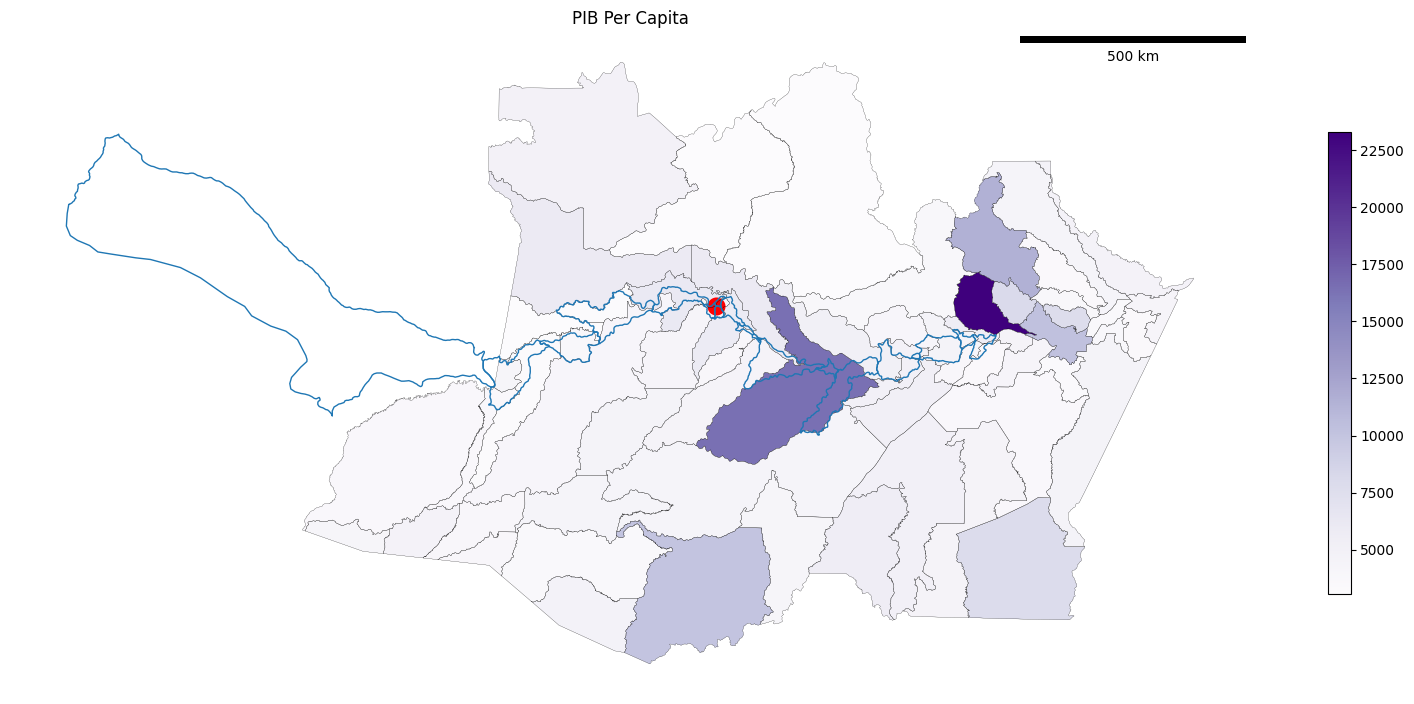

In [35]:
fig, ax = plt.subplots(1, figsize=(20,15))
map_df.boundary.plot(ax=ax, edgecolor='0.8',linewidth=0.12, color='black')
map_df.plot(column='PIB_percap', cmap='Purples',linewidth=0.05, ax=ax, edgecolor='black')
map_rv.boundary.plot(ax=ax, linewidth=1)
mang_g.plot(ax=ax, linewidth=7, color='red')
ax.axis('off')
ax.set_title('PIB Per Capita')
ax.add_artist(ScaleBar(1))


sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,shrink=0.4)

fig.savefig('dist_log1.png', dpi = 300)

In [29]:
map_df.crs

<Projected CRS: EPSG:32619>
Name: WGS 84 / UTM zone 19N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, northern hemisphere between equator and 84°N, onshore and offshore. Aruba. Bahamas. Brazil. Canada - New Brunswick (NB); Labrador; Nunavut; Nova Scotia (NS); Quebec. Colombia. Dominican Republic. Greenland. Netherlands Antilles. Puerto Rico. Turks and Caicos Islands. United States. Venezuela.
- bounds: (-72.0, 0.0, -66.0, 84.0)
Coordinate Operation:
- name: UTM zone 19N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich